In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from terminal_optimization import hydrogen_objects
from terminal_optimization import hydrogen_defaults
from terminal_optimization import hydrogen_system

# 0. Prepare inputs

In [2]:
startyear = 2018
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2023:
        demand.append(1_000_000)
    else:
        demand.append(2_000_000)

scenario_data={'year': years, 'volume': demand}

# instantiate a commodity objects
lhydrogen = hydrogen_objects.Commodity(**hydrogen_defaults.lhydrogen_data)
lhydrogen.scenario_data = pd.DataFrame(data=scenario_data)

# Ammonia
hydrogen_defaults.ammonia_data['historic_data'] = []
hydrogen_defaults.ammonia_data['scenario_data'] = []
ammonia = hydrogen_objects.Commodity(**hydrogen_defaults.ammonia_data)

# MCH
hydrogen_defaults.MCH_data['historic_data'] = []
hydrogen_defaults.MCH_data['scenario_data'] = []
MCH = hydrogen_objects.Commodity(**hydrogen_defaults.MCH_data)

# combine
demand = [lhydrogen, ammonia, MCH]

# plot scenarios 
if False:
    lhydrogen.plot_demand()
    ammonia.plot_demand()
    MCH.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
Smallhydrogen = hydrogen_objects.Vessel(**hydrogen_defaults.smallhydrogen_data)
Largehydrogen = hydrogen_objects.Vessel(**hydrogen_defaults.largehydrogen_data)
Smallammonia = hydrogen_objects.Vessel(**hydrogen_defaults.smallammonia_data)
Largeammonia = hydrogen_objects.Vessel(**hydrogen_defaults.largeammonia_data)
Handysize = hydrogen_objects.Vessel(**hydrogen_defaults.handysize_data)
Panamax = hydrogen_objects.Vessel(**hydrogen_defaults.panamax_data)
VLCC = hydrogen_objects.Vessel(**hydrogen_defaults.vlcc_data)


vessels = [Smallhydrogen, Largehydrogen, Smallammonia, Largeammonia, Handysize, Panamax, VLCC] 

# 1. Instatiate terminal system

In [5]:
Terminal = hydrogen_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 5840,   # example Wijnand
                         debug=True,
                         storage_type_defaults=hydrogen_defaults.storage_lh2_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()


Simulate year: 2018
  Total vessel calls: 54
     Small Hydrogen  calls: 30
     Large Hydrogen calls: 24
     Small ammonia calls: 0
     Large ammonia calls: 0
     Handysize calls: 0
     Panamax calls: 0
     VLCC calls: 0
  Total cargo volume: 1000000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Unloading occupancy planned (@ start of year): inf
     Unloading occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding ber

     a total of 2 Hinterland_station_01 is online; 2 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): 0.23818493150684933
     Berth occupancy online (@ start of year): 0.23818493150684933
     Unloading occupancy planned (@ start of year): 0.1832191780821918
     Unloading occupancy online (@ start of year): 0.1832191780821918
     waiting time factor (@ start of year): 0
     waiting time occupancy (@ start of year): 0.0
     a total of 4000 ton of pipeline_jetty service capacity is online; 4000 ton total planned
     a total of 88000 ton of HydrogenTank storage capacity is online; 88000 ton total planned
     a total of 625 ton of h2 retrieval capacity is online; 750 ton total planned
     a total of 4000 ton of pipeline hinterland service capacity is online; 4000 ton total planned
     Station occupancy planned (@ start of year): 0.3111917560504348
     Station occupancy online (@ start of year): 0.3111917560504348
     Number of trains (@start of ye

## Report all elements

In [7]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Liquid hydrogen

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':    year   volume
0  2018  1000000
1  2019  1000000
2  2020  1000000
3  2021  1000000
4  2022  1000000
5  2023  2000000
6  2024  2000000
7  2025  2000000
8  2026  2000000
9  2027  2000000, 'handling_fee': 1000, 'smallhydrogen_perc': 30, 'largehydrogen_perc': 70, 'smallammonia_perc': 0, 'largeammonia_perc': 0, 'handysize_perc': 0, 'panamax_perc': 0, 'vlcc_perc': 0, 'name': 'Liquid hydrogen', 'id': 'ff13a918-6032-11e9-a02b-c8ff2870e0c9'}

Ammonia

{'historic_data': [], 'scenario_data': [], 'handling_fee': 1000, 'smallhydrogen_perc': 0, 'largehydrogen_perc': 0, 'smallammonia_perc': 40, 'largeammonia_perc': 60, 'handysize_perc': 0, 'panamax_perc': 0, 'vlcc_perc': 0, 'name': 'Ammonia', 'id': 'ff13d024-6032-11e9-861e-c8ff2870e0c9'}

MCH

{'historic_data': [], 'scenario_data': [], 'handling_fee': 1000, 'smallhydrogen_perc': 0, 'largehydroge

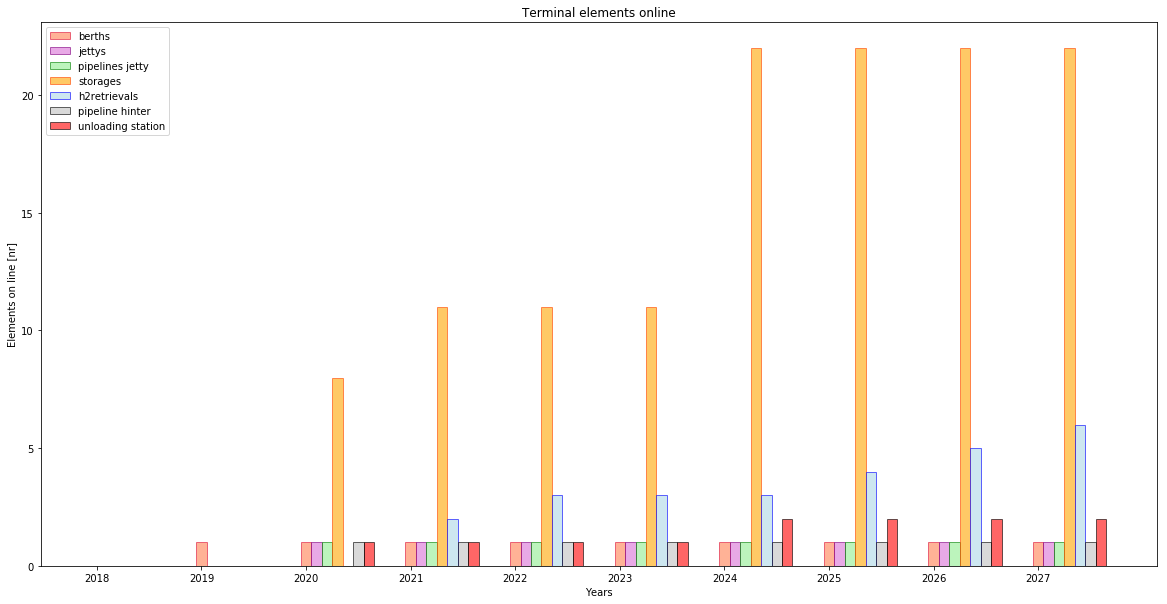

In [8]:
Terminal.terminal_elements_plot()

In [9]:
Terminal.add_cashflow_elements()

(   year         capex  maintenance    insurance        energy        labour  \
 0  2018  7.278000e+07          0.0          0.0  0.000000e+00  0.000000e+00   
 1  2019  4.083020e+09          0.0          0.0  0.000000e+00  0.000000e+00   
 2  2020  1.526080e+09   42204000.0   41296000.0  1.868914e+09  1.511454e+06   
 3  2021  7.280000e+06   57924000.0   56656000.0  2.692114e+09  1.887685e+06   
 4  2022  0.000000e+00   58284000.0   56836000.0  2.753314e+09  1.962931e+06   
 5  2023  5.514120e+09   58284000.0   56836000.0  2.931625e+09  1.962931e+06   
 6  2024  1.820000e+07  113300000.0  111844000.0  5.501152e+09  2.941131e+06   
 7  2025  1.820000e+07  113660000.0  112024000.0  5.621752e+09  3.016377e+06   
 8  2026  7.280000e+06  114020000.0  112204000.0  5.742352e+09  3.091623e+06   
 9  2027  0.000000e+00  114380000.0  112384000.0  5.862952e+09  3.166869e+06   
 
    demurrage    revenues  
 0          0           0  
 1          0           0  
 2          0  1000000000  
 3    

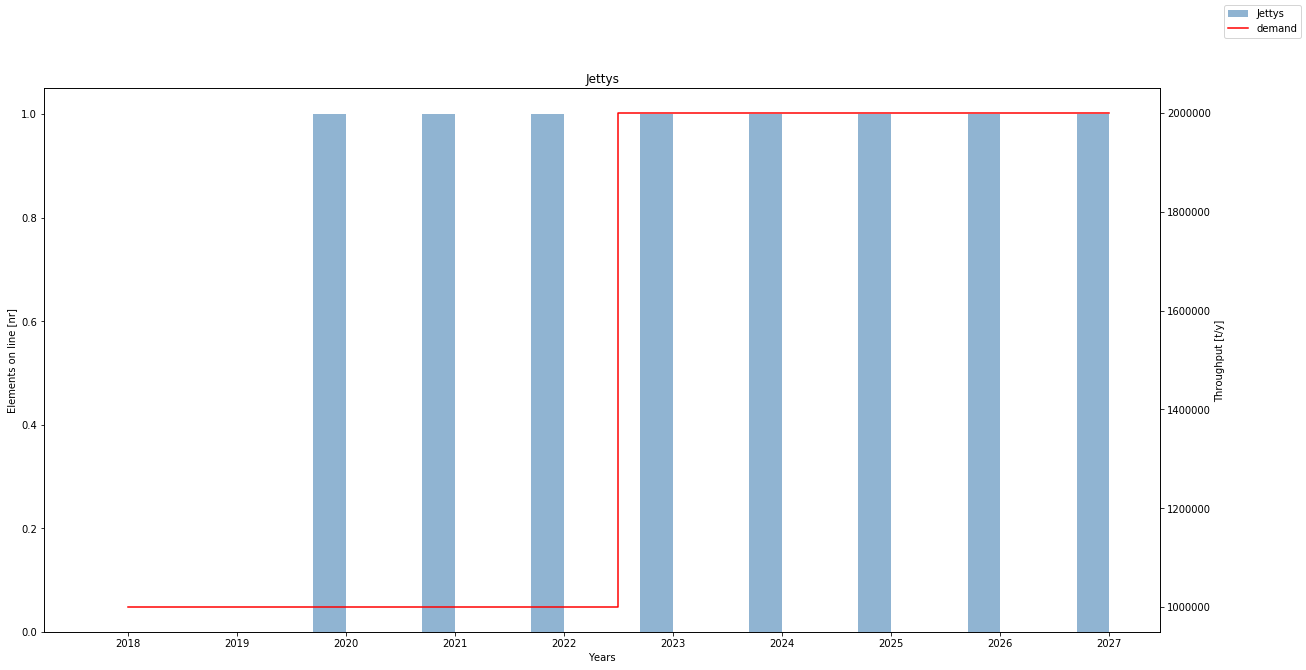

In [10]:
Terminal.terminal_elements_example_plot()

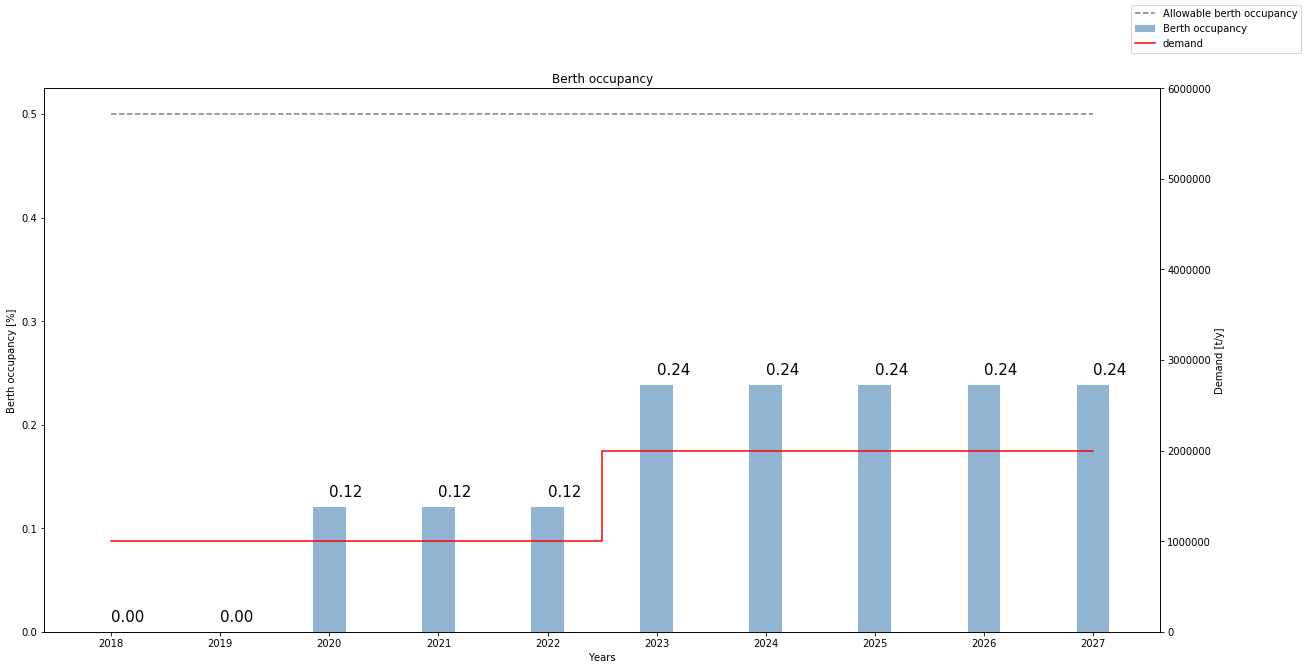

In [11]:
Terminal.terminal_occupancy_example_plot()

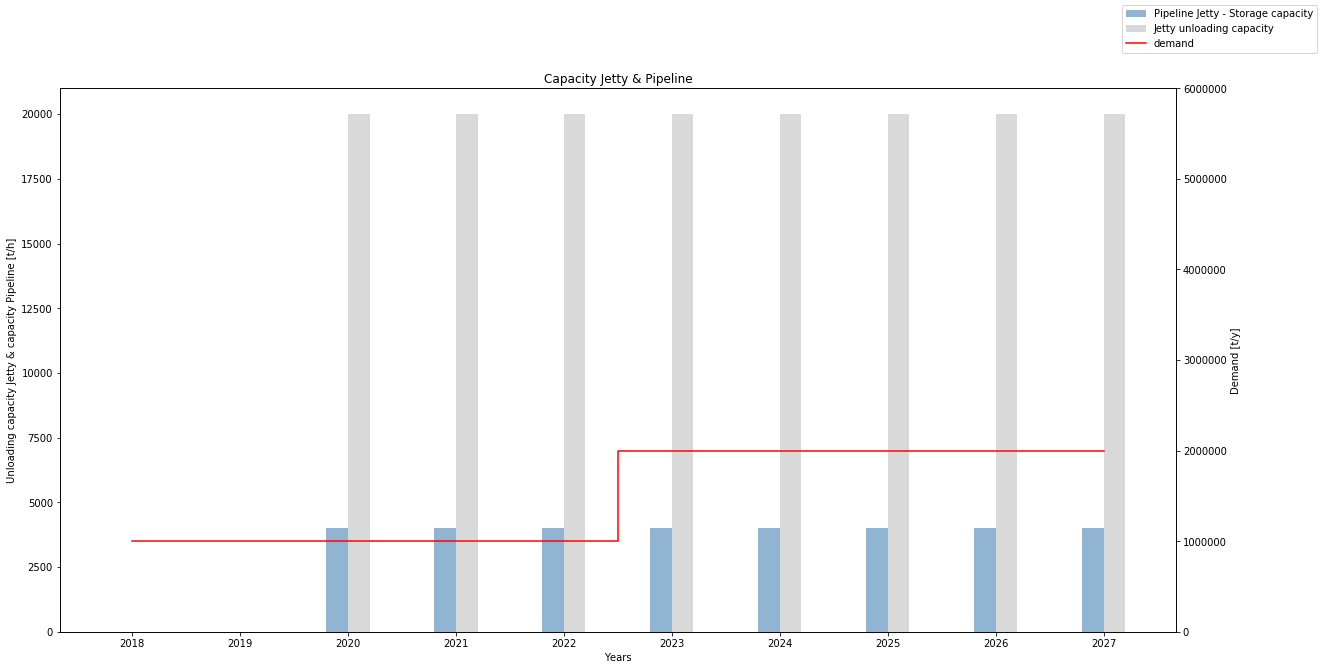

In [12]:
Terminal.terminal_pipeline_plot()

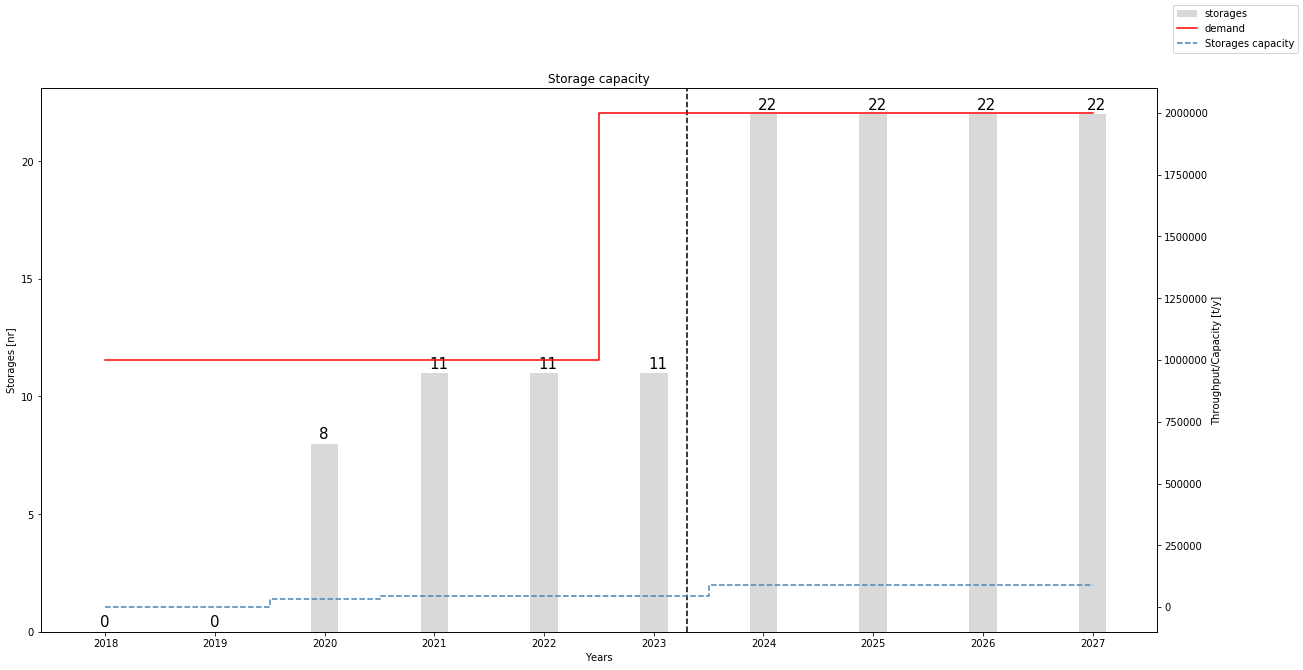

In [13]:
Terminal.terminal_capacity_plot()

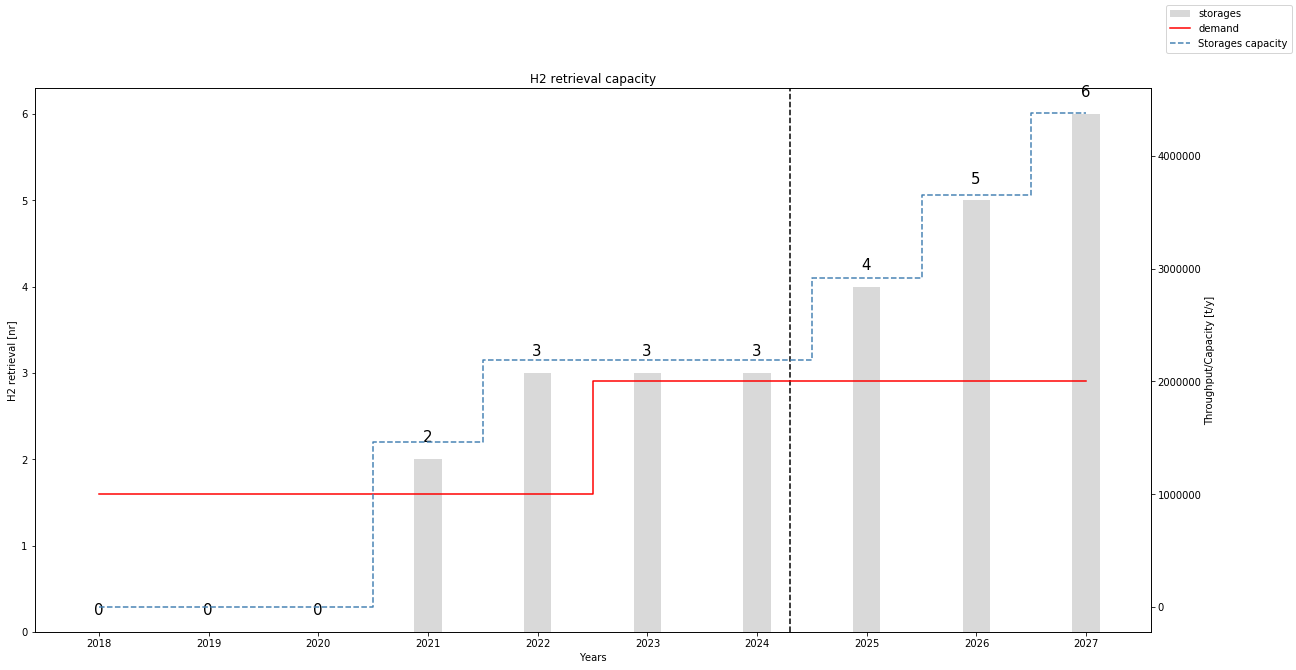

In [14]:
Terminal.H2retrieval_capacity_plot()

In [15]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

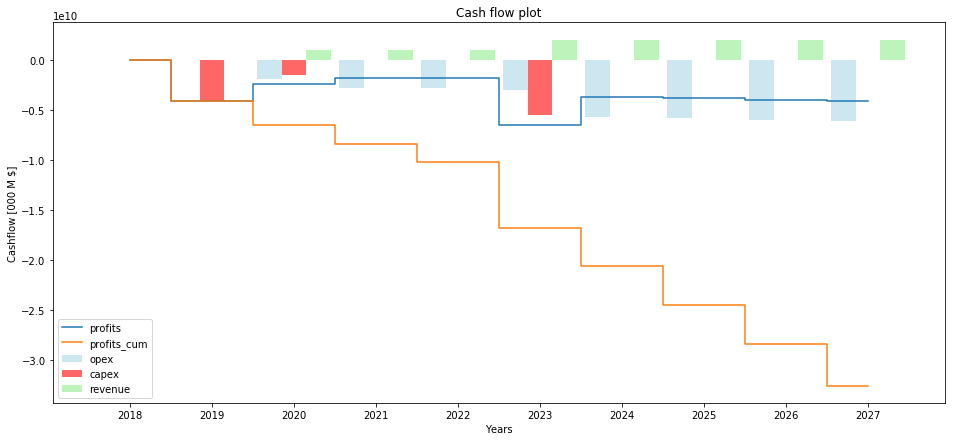

In [16]:
Terminal.cashflow_plot(cash_flows)

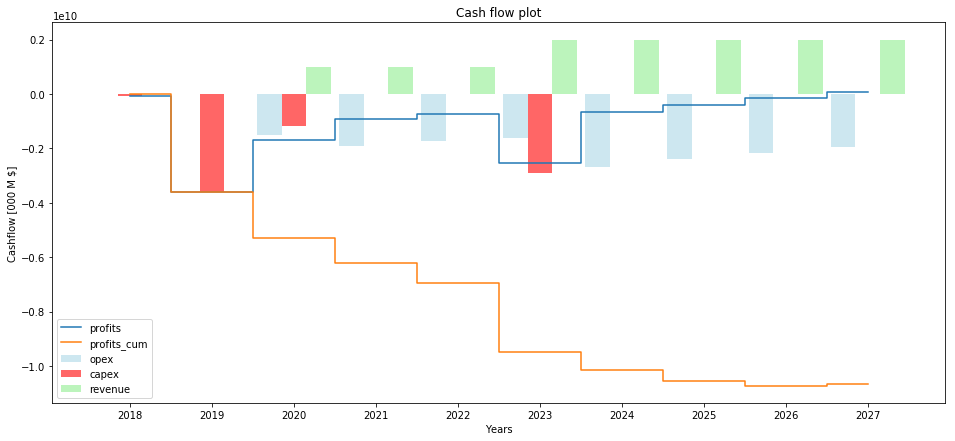

In [17]:
Terminal.cashflow_plot(cash_flows_WACC_real)

## SandBox

In [18]:
Terminal.NPV()

PV: [-7.27800000e+07 -3.59520062e+09 -1.69813191e+09 -9.22366532e+08
 -7.25474153e+08 -2.53236975e+09 -6.78699377e+08 -4.08406304e+08
 -1.60517267e+08  6.13587706e+07]
NPV: -10732587139.406733
